In [1]:
## Bilbliotecas para analise e processamento

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 


## Bibliotecas para criação do modelo
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


##Bibliotecas para avalição do modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import feature_selection

## Bibliotecas para vizualização
from matplotlib import pyplot 
%matplotlib inline
import matplotlib.pyplot as plt

## Bibliotecas auxiliares
import random
from datetime import datetime
from time import time
import locale



In [2]:
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR')
except:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil')

In [3]:
dataset01 = pd.read_csv('Questão 2 - Base 1.txt', sep = "\t")
dataset02 = pd.read_csv('Questão 2 - Base 2.txt', sep = "\t")
dataset03 = pd.read_csv('Questão 2 - Base 3.txt', sep = "\t")
dataset04 = pd.read_csv('Questão 2 - Base 4.txt', sep = "\t")
dataset05 = pd.read_csv('Questão 2 - Base 5.txt', sep = "\t")


In [4]:
dataset01.head()

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA
0,1194908,2018-11-22,221,324.38,463.73,0
1,1447997,2018-11-22,191,334.82,451.56,1
2,1035415,2018-11-22,252,1682.26,2554.18,0
3,1069434,2018-11-22,231,1625.01,2368.65,0
4,1427566,2018-11-22,270,320.07,503.25,0


In [5]:
dataset02.head()

,ID_CONTA,DT_ACORDO,QTD_PARCELAMENTO_3M,QTD_PARCELAMENTO_6M,QTD_PARCELAMENTO_12M
0,1194908,2018-11-22,0,0,0
1,1427566,2018-11-22,0,0,0
2,981592,2018-11-22,0,0,1
3,1329412,2018-11-22,0,0,0
4,1348857,2018-11-22,1,1,1


In [6]:
dataset03.head()

,ID_CONTA,DT_ACORDO,LIMITE
0,999913,2018-11-22,1229.0
1,999609,2018-11-22,831.0
2,999473,2018-11-22,455.0
3,999368,2018-11-22,3073.0
4,999251,2018-11-22,1052.0


In [7]:
dataset04.head()

,ID_CONTA,DT_ACORDO,QTD_EXTRATOS,QTD_FX0_GERAL,QTD_FX1_GERAL,QTD_FX2_GERAL,QTD_FX0_3M,QTD_FX0_6M,QTD_FX1_3M,QTD_FX1_6M,QTD_FX2_3M,QTD_FX2_6M
0,1385626,2018-11-22 00:00:00.000,5,5,0,0,4,6,0,0,0,0
1,1405852,2018-11-22 00:00:00.000,3,2,1,0,3,3,1,1,0,0
2,1163186,2018-11-22 00:00:00.000,26,23,2,1,4,5,0,1,0,1
3,1194908,2018-11-22 00:00:00.000,17,16,1,0,4,7,0,0,0,0
4,1419680,2018-11-22 00:00:00.000,2,2,0,0,3,3,0,0,0,0


In [8]:
dataset04.head()

,ID_CONTA,DT_ACORDO,QTD_EXTRATOS,QTD_FX0_GERAL,QTD_FX1_GERAL,QTD_FX2_GERAL,QTD_FX0_3M,QTD_FX0_6M,QTD_FX1_3M,QTD_FX1_6M,QTD_FX2_3M,QTD_FX2_6M
0,1385626,2018-11-22 00:00:00.000,5,5,0,0,4,6,0,0,0,0
1,1405852,2018-11-22 00:00:00.000,3,2,1,0,3,3,1,1,0,0
2,1163186,2018-11-22 00:00:00.000,26,23,2,1,4,5,0,1,0,1
3,1194908,2018-11-22 00:00:00.000,17,16,1,0,4,7,0,0,0,0
4,1419680,2018-11-22 00:00:00.000,2,2,0,0,3,3,0,0,0,0


In [9]:
dataset = dataset01.copy() 

### 2.1. Qual o percentual de adesão mensal por faixa de atraso (Histórico)?

#### PROCESSAMENTO DOS DADOS

In [10]:
## Verificando a existencia de alguma linha nula
dataset.isna().sum()

ID_CONTA          0
DT_ACORDO         0
NU_DIAS_ATRASO    0
VALOR_CRELIQ      0
DIVIDA_ATUAL      0
RESPOSTA          0
dtype: int64

In [11]:
dataset.describe()

,ID_CONTA,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA
count,7.253300e+04,72533.000000,72533.000000,72533.000000,72533.000000
mean,1.087210e+06,326.609640,1636.498101,2999.851565,0.029573
std,3.014515e+05,97.165081,1322.990780,2618.975888,0.169407
min,3.609500e+04,181.000000,13.250000,23.910000,0.000000
25%,8.951820e+05,245.000000,756.710000,1240.170000,0.000000
50%,1.164142e+06,311.000000,1279.220000,2223.790000,0.000000
75%,1.306901e+06,400.000000,2091.400000,3995.330000,0.000000
max,1.578702e+06,540.000000,20692.120000,48541.620000,1.000000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72533 entries, 0 to 72532
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_CONTA        72533 non-null  int64  
 1   DT_ACORDO       72533 non-null  object 
 2   NU_DIAS_ATRASO  72533 non-null  int64  
 3   VALOR_CRELIQ    72533 non-null  float64
 4   DIVIDA_ATUAL    72533 non-null  float64
 5   RESPOSTA        72533 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 3.3+ MB


In [13]:
dataset.shape

(72533, 6)

### RESOLUÇÃO

In [14]:

dataset_filtro = dataset[['DT_ACORDO','NU_DIAS_ATRASO','RESPOSTA']]
dataset_filtro.head()


,DT_ACORDO,NU_DIAS_ATRASO,RESPOSTA
0,2018-11-22,221,0
1,2018-11-22,191,1
2,2018-11-22,252,0
3,2018-11-22,231,0
4,2018-11-22,270,0


In [15]:
dataset_filtro['DT_ACORDO'] = pd.to_datetime(dataset_filtro['DT_ACORDO'])
dataset_filtro.info() ## Mostrando alteração de tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72533 entries, 0 to 72532
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DT_ACORDO       72533 non-null  datetime64[ns]
 1   NU_DIAS_ATRASO  72533 non-null  int64         
 2   RESPOSTA        72533 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


C:\Users\adsom\AppData\Local\Temp\ipykernel_11672\2193395391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtro['DT_ACORDO'] = pd.to_datetime(dataset_filtro['DT_ACORDO'])


In [16]:
## Melhorando visualização da data 
dataset_filtro['DT_ACORDO'] = dataset_filtro['DT_ACORDO'].apply(lambda x: x.strftime("%B - %Y"))
dataset_filtro.head()



C:\Users\adsom\AppData\Local\Temp\ipykernel_11672\2476042813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtro['DT_ACORDO'] = dataset_filtro['DT_ACORDO'].apply(lambda x: x.strftime("%B - %Y"))


,DT_ACORDO,NU_DIAS_ATRASO,RESPOSTA
0,novembro - 2018,221,0
1,novembro - 2018,191,1
2,novembro - 2018,252,0
3,novembro - 2018,231,0
4,novembro - 2018,270,0


In [17]:
dataset_filtro['NU_DIAS_ATRASO'].describe()

count    72533.000000
mean       326.609640
std         97.165081
min        181.000000
25%        245.000000
50%        311.000000
75%        400.000000
max        540.000000
Name: NU_DIAS_ATRASO, dtype: float64

In [18]:
faixa_atraso = ['181 - 281', '282 - 382', '383 - 483', '484 pra cima']

def intervalos_faixa(nu_dias_de_atraso):
    
    if nu_dias_de_atraso >= 181 and nu_dias_de_atraso <= 281:  # quando o 'NU_DIAS_ATRASO' possui valor de 181 a 281
        return '181 - 281'
    elif nu_dias_de_atraso >= 282 and nu_dias_de_atraso <= 382: # quando o 'NU_DIAS_ATRASO' possui valor de 282 a 382
        return '282 - 382'
    elif nu_dias_de_atraso >= 383 and nu_dias_de_atraso <= 483: # quando o 'NU_DIAS_ATRASO' possui valor de 383 a 483'
        return '383 - 483'
    else:  # quando o 'NU_DIAS_ATRASO' possui valor acima de 484 (com máximo 540)
        return '484 pra cima'

dataset_filtro['INTERVALOS'] = dataset_filtro['NU_DIAS_ATRASO'].apply(lambda x: intervalos_faixa(x))
dataset_filtro

C:\Users\adsom\AppData\Local\Temp\ipykernel_11672\1931155666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtro['INTERVALOS'] = dataset_filtro['NU_DIAS_ATRASO'].apply(lambda x: intervalos_faixa(x))


,DT_ACORDO,NU_DIAS_ATRASO,RESPOSTA,INTERVALOS
0,novembro - 2018,221,0,181 - 281
1,novembro - 2018,191,1,181 - 281
2,novembro - 2018,252,0,181 - 281
3,novembro - 2018,231,0,181 - 281
4,novembro - 2018,270,0,181 - 281
...,...,...,...,...
72528,junho - 2019,405,0,383 - 483
72529,junho - 2019,242,0,181 - 281
72530,junho - 2019,293,0,282 - 382
72531,junho - 2019,191,0,181 - 281


In [19]:
#Criação de um novo DataFrame para passar os dados desejados
dataset_adesao = pd.DataFrame()


condicao = (dataset_filtro['RESPOSTA'] == 1) ## Criando filtro de respostas igual 1

#Criação do cálculo da porcentagem para cada faixa
dataset_adesao['181 - 281'] = round((dataset_filtro[condicao & (dataset_filtro['INTERVALOS'] == '181 - 281')].groupby('DT_ACORDO')['RESPOSTA'].count())/dataset_filtro.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100
dataset_adesao['282 - 382'] = round((dataset_filtro[condicao & (dataset_filtro['INTERVALOS'] == '282 - 382')].groupby('DT_ACORDO')['RESPOSTA'].count())/dataset_filtro.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100
dataset_adesao['383 - 483'] = round((dataset_filtro[condicao & (dataset_filtro['INTERVALOS'] == '383 - 483')].groupby('DT_ACORDO')['RESPOSTA'].count())/dataset_filtro.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100
dataset_adesao['484 pra cima'] = round((dataset_filtro[condicao & (dataset_filtro['INTERVALOS'] == '484 pra cima')].groupby('DT_ACORDO')['RESPOSTA'].count())/dataset_filtro.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100

#Colocação do índice da tabela
dataset_adesao.reset_index(inplace=True)

#Chamada da tabela
dataset_adesao



,DT_ACORDO,181 - 281,282 - 382,383 - 483,484 pra cima
0,abril - 2019,14.43,12.21,5.92,2.34
1,junho - 2019,1.47,0.93,0.55,0.15
2,março - 2019,0.39,0.40,0.44,0.14
3,novembro - 2018,2.11,1.15,NaN,NaN


In [20]:
dataset_adesao.fillna(0, inplace = True) ## Realizando a troca das linhas nulas por zero


In [21]:
dataset_adesao['% de Adesão Mensal'] = dataset_adesao['181 - 281'] + dataset_adesao['282 - 382'] + dataset_adesao['383 - 483'] + dataset_adesao['484 pra cima']
dataset_adesao



,DT_ACORDO,181 - 281,282 - 382,383 - 483,484 pra cima,% de Adesão Mensal
0,abril - 2019,14.43,12.21,5.92,2.34,34.90
1,junho - 2019,1.47,0.93,0.55,0.15,3.10
2,março - 2019,0.39,0.40,0.44,0.14,1.37
3,novembro - 2018,2.11,1.15,0.00,0.00,3.26


#### PLOTAGEM DO GRÁFICO

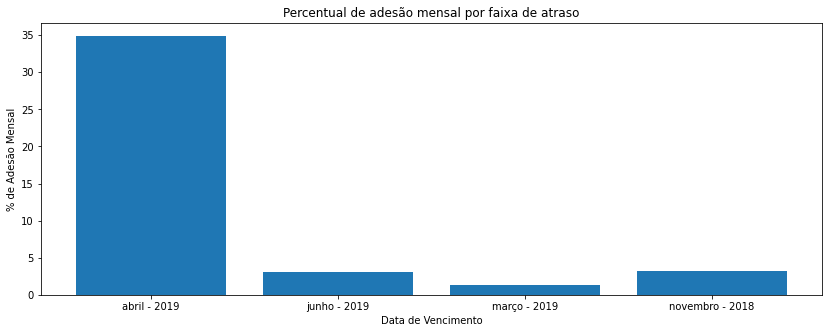

In [22]:
# Gráfico
%matplotlib inline

plt.figure(figsize = (14,5))
plt.bar(dataset_adesao['DT_ACORDO'], dataset_adesao['% de Adesão Mensal'])
plt.xticks(dataset_adesao['DT_ACORDO'])
plt.ylabel('% de Adesão Mensal')
plt.xlabel('Data de Vencimento')

#Título do gráfico
plt.title('Percentual de adesão mensal por faixa de atraso')

plt.show()

###  2.2. Qual modelo preditivo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada)



### 2.3. Quais indicadores e ferramentas você utilizaria para avaliar a performance/aderência desse modelo? (Descreva os indicadores utilizados)

### 2.4 – Apresente o modelo desenvolvido utilizando a técnica do item (2.2) e as técnicas de avaliação descritas no item (2.3

## NearMiss

In [23]:
X = dataset01[['NU_DIAS_ATRASO', 'DIVIDA_ATUAL']]
y = dataset01['RESPOSTA']

nr = NearMiss()
X, y = nr.fit_resample(X, y) ## Aplicando NearMiss

### RANDOM FOREST CLASSIFIER

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) ## Separando dados de treino e teste
arvores =  RandomForestClassifier(n_estimators = 10 ,random_state = 0) ## Instanciando
arvores.fit(X_train,y_train) ## Treinando Algoritimo
y_pred=arvores.predict(X_test)

In [25]:
## Checando Accuracy do modelo
accuracy_score(y_test, y_pred)

0.7539608574091333

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       543
           1       0.78      0.69      0.74       530

    accuracy                           0.75      1073
   macro avg       0.76      0.75      0.75      1073
weighted avg       0.76      0.75      0.75      1073



#### SMOTE

In [27]:
X = dataset01[['NU_DIAS_ATRASO', 'DIVIDA_ATUAL']]
y = dataset01['RESPOSTA']

sm = SMOTE()
X, y = sm.fit_resample(X, y) ## Aplicando SMOTE

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) ## Separando dados de treino e teste
arvores =  RandomForestClassifier(n_estimators = 10 ,random_state = 0) ## Instanciando
arvores.fit(X_train,y_train) ## Treinando Algoritimo
y_pred=arvores.predict(X_test)

In [29]:
## Checando Accuracy do modelo
accuracy_score(y_test, y_pred)

0.8188611695175314

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     17535
           1       0.82      0.82      0.82     17659

    accuracy                           0.82     35194
   macro avg       0.82      0.82      0.82     35194
weighted avg       0.82      0.82      0.82     35194

